In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from hockey_rink import NHLRink, RinkImage
import numpy as np

C:\Users\KMGre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
league_avgs = pd.read_excel('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/league_averages.xlsx')
league_avgs

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92
2,3,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74
3,4,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82
4,5,2018-19,NHL,1271,3.01,0.58,2.92,19.78,80.22,31.3,28.5,0.910,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,1921-22,NHL,48,3.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.88
101,102,1920-21,NHL,48,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19
102,103,1919-20,NHL,48,4.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70
103,104,1918-19,NHL,27,4.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05


In [3]:
league_avgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      105 non-null    int64  
 1   Season  105 non-null    object 
 2   Lg      105 non-null    object 
 3   GP      105 non-null    int64  
 4   G       105 non-null    float64
 5   PP      89 non-null     float64
 6   PPO     59 non-null     float64
 7   PP%     59 non-null     float64
 8   PK%     59 non-null     float64
 9   SA      67 non-null     float64
 10  SV      67 non-null     float64
 11  SV%     67 non-null     float64
 12  GAA     105 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 10.8+ KB


In [4]:
league_new = league_avgs[league_avgs["Season"] > '1980-1981']
league_new

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92
2,3,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74
3,4,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82
4,5,2018-19,NHL,1271,3.01,0.58,2.92,19.78,80.22,31.3,28.5,0.910,2.81
5,6,2017-18,NHL,1271,2.97,0.61,3.04,20.18,79.82,31.8,29.0,0.912,2.78
6,7,2016-17,NHL,1230,2.77,0.57,2.99,19.10,80.90,30.1,27.5,0.913,2.59
7,8,2015-16,NHL,1230,2.71,0.58,3.11,18.66,81.34,29.6,27.1,0.915,2.51
8,9,2014-15,NHL,1230,2.73,0.57,3.06,18.66,81.34,29.8,27.3,0.915,2.52
9,10,2013-14,NHL,1230,2.74,0.59,3.27,17.89,82.11,30.0,27.4,0.914,2.56


In [5]:
#filepath = Path('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/league_avgs.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#league_new.to_csv(filepath)  

In [6]:
league_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      42 non-null     int64  
 1   Season  42 non-null     object 
 2   Lg      42 non-null     object 
 3   GP      42 non-null     int64  
 4   G       42 non-null     float64
 5   PP      42 non-null     float64
 6   PPO     42 non-null     float64
 7   PP%     42 non-null     float64
 8   PK%     42 non-null     float64
 9   SA      42 non-null     float64
 10  SV      42 non-null     float64
 11  SV%     42 non-null     float64
 12  GAA     42 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 4.6+ KB


<AxesSubplot:xlabel='G', ylabel='Season'>

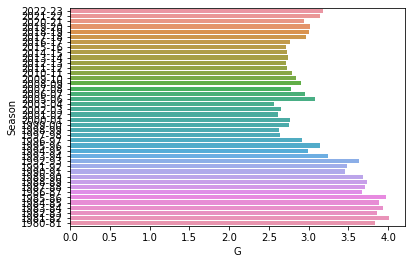

In [7]:
sns.barplot(data=league_new, x="G", y="Season")

In [8]:
#sns.lineplot( x = "G",
             #y = "Season",
             #data = league_new);

In [9]:
df_1980 = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990 = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000 = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010 = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_20201 = league_new[league_new["Season"] > '2019-20']
df_2020 = df_20201[df_20201["Season"] > '2020-21']
df_2020

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92


In [10]:
g_2020 = df_2020.loc[:, 'G'].mean()
g_2010 = df_2010.loc[:, 'G'].mean()
g_2000 = df_2000.loc[:, 'G'].mean()
g_1990 = df_1990.loc[:, 'G'].mean()
g_1980 = df_1980.loc[:, 'G'].mean()
g_1980

3.797272727272727

In [11]:
data = [['1980s', g_1980], ['1990s', g_1990], ['2000s', g_2000], ['2010s', g_2010], ['2020s', g_2020]]
goals_by_decade = pd.DataFrame(data, columns=['Decade', 'Goals'])
goals_by_decade

,Decade,Goals
0,1980s,3.797273
1,1990s,3.088000
2,2000s,2.795000
3,2010s,2.819000
4,2020s,3.160000


<AxesSubplot:xlabel='Decade', ylabel='Goals'>

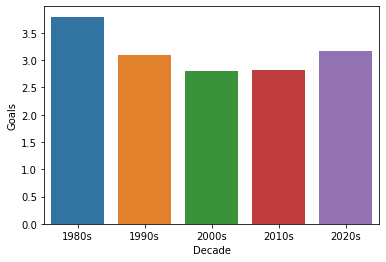

In [12]:
sns.barplot(data=goals_by_decade, x="Decade", y="Goals")

In [13]:
#sns.lineplot( x = "Decade",
             #y = "Goals",
             #data = goals_by_decade);

In [14]:
df_1980_sv = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990_sv = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000_sv = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010_sv = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_2020_sv1 = league_new[league_new["Season"] > '2019-20']
df_2020_sv = df_2020_sv1[df_20201["Season"] > '2020-21']

sv_2020 = df_2020_sv.loc[:, 'SV%'].mean()
sv_2010 = df_2010_sv.loc[:, 'SV%'].mean()
sv_2000 = df_2000_sv.loc[:, 'SV%'].mean()
sv_1990 = df_1990_sv.loc[:, 'SV%'].mean()
sv_1980 = df_1980_sv.loc[:, 'SV%'].mean()

data1 = [['1980s', sv_1980], ['1990s', sv_1990], ['2000s', sv_2000], ['2010s', sv_2010], ['2020s', sv_2020]]
sv_by_decade = pd.DataFrame(data1, columns=['Decade', 'Save Percentage'])
sv_by_decade

#sns.barplot(data=sv_by_decade, x="Decade", y="Save Percentage")

,Decade,Save Percentage
0,1980s,0.877455
1,1990s,0.897600
2,2000s,0.907800
3,2010s,0.912800
4,2020s,0.905500


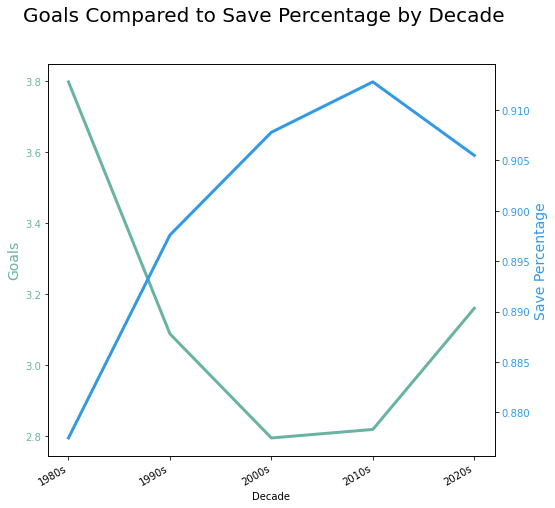

In [15]:
color1 = "#69b3a2"
color2 = "#3399e6"
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [g_1980, g_1990, g_2000, g_2010, g_2020], color=color1, lw=3)
ax2.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [sv_1980, sv_1990, sv_2000, sv_2010, sv_2020], color=color2, lw=3)

ax1.set_xlabel("Decade")
ax1.set_ylabel("Goals", color=color1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=color1)

ax2.set_ylabel("Save Percentage", color=color2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=color2)

fig.suptitle("Goals Compared to Save Percentage by Decade", fontsize=20)
fig.autofmt_xdate()

In [16]:
df_1980_pp = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990_pp = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000_pp = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010_pp = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_2020_pp1 = league_new[league_new["Season"] > '2019-20']
df_2020_pp = df_2020_pp1[df_2020_pp1["Season"] > '2020-21']

pp_2020 = df_2020_pp.loc[:, 'PP%'].mean()
pp_2010 = df_2010_pp.loc[:, 'PP%'].mean()
pp_2000 = df_2000_pp.loc[:, 'PP%'].mean()
pp_1990 = df_1990_pp.loc[:, 'PP%'].mean()
pp_1980 = df_1980_pp.loc[:, 'PP%'].mean()

data2 = [['1980s', pp_1980], ['1990s', pp_1990], ['2000s', pp_2000], ['2010s', pp_2010], ['2020s', pp_2020]]
pp_by_decade = pd.DataFrame(data2, columns=['Decade', 'Powerplay Percentage'])
pp_by_decade

,Decade,Powerplay Percentage
0,1980s,21.557273
1,1990s,17.586000
2,2000s,17.351000
3,2010s,18.785000
4,2020s,20.960000


<AxesSubplot:xlabel='Decade', ylabel='Powerplay Percentage'>

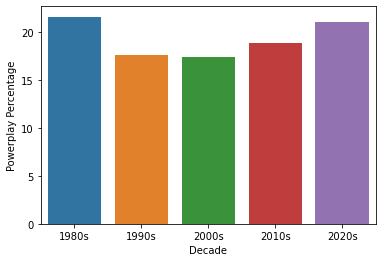

In [17]:
sns.barplot(data=pp_by_decade, x="Decade", y="Powerplay Percentage")

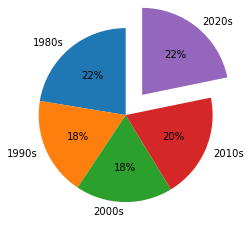

In [18]:
data = pp_by_decade['Powerplay Percentage']
labels = pp_by_decade['Decade']

plt.pie(
    data, 
    labels=labels,
    autopct='%.0f%%',
    startangle=90,
    explode=[0.0, 0.0, 0.0, 0.0, 0.3]
)
plt.show()

In [19]:
df_1980_sa = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990_sa = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000_sa = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010_sa = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_2020_sa1 = league_new[league_new["Season"] > '2019-20']
df_2020_sa = df_2020_sa1[df_2020_sa1["Season"] > '2020-21']

sa_2020 = df_2020_sa.loc[:, 'SA'].mean()
sa_2010 = df_2010_sa.loc[:, 'SA'].mean()
sa_2000 = df_2000_sa.loc[:, 'SA'].mean()
sa_1990 = df_1990_sa.loc[:, 'SA'].mean()
sa_1980 = df_1980_sa.loc[:, 'SA'].mean()

data3 = [['1980s', sa_1980], ['1990s', sa_1990], ['2000s', sa_2000], ['2010s', sa_2010], ['2020s', sa_2020]]
sa_by_decade = pd.DataFrame(data3, columns=['Decade', 'Shots'])
sa_by_decade

,Decade,Shots
0,1980s,30.409091
1,1990s,29.340000
2,2000s,29.040000
3,2010s,30.290000
4,2020s,31.250000


In [20]:
#sns.lineplot( x = "Decade",
            # y = "Shots",
             #data = sa_by_decade);

In [21]:
league_new.loc[:,'SHG'] = [8, 7, 4, 6, 8, 7, 6, 6, 6, 7, 3, 6, 7, 6, 8, 8, 9, 11, 8, 8, 7, 9, 8, 8, 10, 10, 12, 6, 12, 13, 11, 11, 11, 12, 13, 10, 11, 11, 11, 9, 9, 10]
league_new

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\2576536153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_new.loc[:,'SHG'] = [8, 7, 4, 6, 8, 7, 6, 6, 6, 7, 3, 6, 7, 6, 8, 8, 9, 11, 8, 8, 7, 9, 8, 8, 10, 10, 12, 6, 12, 13, 11, 11, 11, 12, 13, 10, 11, 11, 11, 9, 9, 10]


,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA,SHG
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97,8
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92,7
2,3,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74,4
3,4,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82,6
4,5,2018-19,NHL,1271,3.01,0.58,2.92,19.78,80.22,31.3,28.5,0.910,2.81,8
5,6,2017-18,NHL,1271,2.97,0.61,3.04,20.18,79.82,31.8,29.0,0.912,2.78,7
6,7,2016-17,NHL,1230,2.77,0.57,2.99,19.10,80.90,30.1,27.5,0.913,2.59,6
7,8,2015-16,NHL,1230,2.71,0.58,3.11,18.66,81.34,29.6,27.1,0.915,2.51,6
8,9,2014-15,NHL,1230,2.73,0.57,3.06,18.66,81.34,29.8,27.3,0.915,2.52,6
9,10,2013-14,NHL,1230,2.74,0.59,3.27,17.89,82.11,30.0,27.4,0.914,2.56,7


<AxesSubplot:xlabel='SHG', ylabel='Season'>

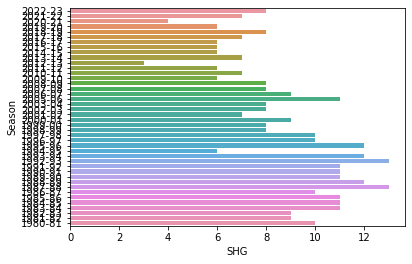

In [22]:
sns.barplot(data=league_new, x="SHG", y="Season")

In [23]:
df_1980_shg = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990_shg = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000_shg = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010_shg = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_2020_shg1 = league_new[league_new["Season"] > '2019-20']
df_2020_shg = df_2020_shg1[df_2020_shg1["Season"] > '2020-21']

shg_2020 = df_2020_shg.loc[:, 'SHG'].mean()
shg_2010 = df_2010_shg.loc[:, 'SHG'].mean()
shg_2000 = df_2000_shg.loc[:, 'SHG'].mean()
shg_1990 = df_1990_shg.loc[:, 'SHG'].mean()
shg_1980 = df_1980_shg.loc[:, 'SHG'].mean()

data4 = [['1980s', shg_1980], ['1990s', shg_1990], ['2000s', shg_2000], ['2010s', shg_2010], ['2020s', shg_2020]]
shg_by_decade = pd.DataFrame(data4, columns=['Decade', 'Shorthanded Goals'])
shg_by_decade

,Decade,Shorthanded Goals
0,1980s,10.727273
1,1990s,10.100000
2,2000s,8.100000
3,2010s,6.200000
4,2020s,7.500000


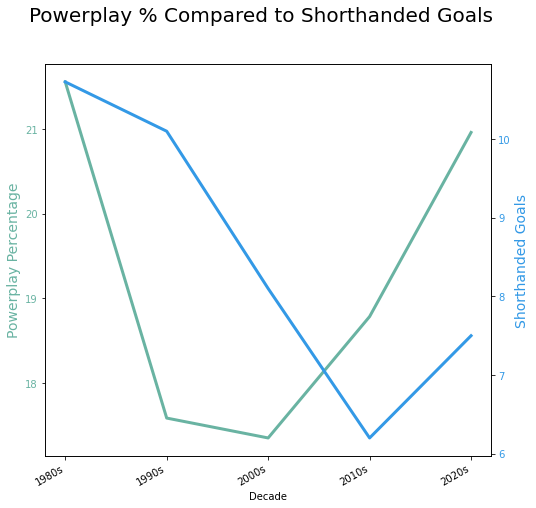

In [24]:
color_1 = "#69b3a2"
color_2 = "#3399e6"
fig, ax_1 = plt.subplots(figsize=(8, 8))
ax_2 = ax_1.twinx()

ax_1.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [pp_1980, pp_1990, pp_2000, pp_2010, pp_2020], color=color_1, lw=3)
ax_2.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [shg_1980, shg_1990, shg_2000, shg_2010, shg_2020], color=color_2, lw=3)

ax_1.set_xlabel("Decade")
ax_1.set_ylabel("Powerplay Percentage", color=color_1, fontsize=14)
ax_1.tick_params(axis="y", labelcolor=color_1)

ax_2.set_ylabel("Shorthanded Goals", color=color_2, fontsize=14)
ax_2.tick_params(axis="y", labelcolor=color_2)

fig.suptitle("Powerplay % Compared to Shorthanded Goals", fontsize=20)
fig.autofmt_xdate()

In [25]:
df_08 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/08-09_teams.csv')
df_08_new = df_08[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_08_5on5 = df_08_new[df_08_new['situation'] == '5on5']
df_08_5on5['pct_of_shots_blocked'] = (df_08_5on5['blockedShotAttemptsFor'] / df_08_5on5['shotAttemptsFor']) * 100
df_08_5on5['blocked_shots_per_game'] = df_08_5on5['blockedShotAttemptsAgainst'] / df_08_5on5['games_played']
pct_blk_sht_08 = df_08_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_08 = df_08_5on5.loc[:, 'blocked_shots_per_game'].mean()
pct_blk_sht_08

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\1603705070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_5on5['pct_of_shots_blocked'] = (df_08_5on5['blockedShotAttemptsFor'] / df_08_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\1603705070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_5on5['blocked_shots_per_game'] = df_08_5on5['blockedShotAttemptsAgainst'] / df_08_5on5['games_played']


24.099679874638273

In [26]:
blk_sht_game_08

9.645011542708021

In [27]:
df_09 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/09-10_teams.csv')
df_09_new = df_09[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_09_5on5 = df_09_new[df_09_new['situation'] == '5on5']
df_09_5on5['pct_of_shots_blocked'] = (df_09_5on5['blockedShotAttemptsFor'] / df_09_5on5['shotAttemptsFor']) * 100
df_09_5on5['blocked_shots_per_game'] = df_09_5on5['blockedShotAttemptsAgainst'] / df_09_5on5['games_played']
pct_blk_sht_09 = df_09_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_09 = df_09_5on5.loc[:, 'blocked_shots_per_game'].mean()
pct_blk_sht_09

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3682827393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_09_5on5['pct_of_shots_blocked'] = (df_09_5on5['blockedShotAttemptsFor'] / df_09_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3682827393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_09_5on5['blocked_shots_per_game'] = df_09_5on5['blockedShotAttemptsAgainst'] / df_09_5on5['games_played']


24.596692523998783

In [28]:
blk_sht_game_09

10.261086018267589

In [29]:
df_10 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/10-11_teams.csv')
df_10_new = df_10[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_10_5on5 = df_10_new[df_10_new['situation'] == '5on5']
df_10_5on5['pct_of_shots_blocked'] = (df_10_5on5['blockedShotAttemptsFor'] / df_10_5on5['shotAttemptsFor']) * 100
df_10_5on5['blocked_shots_per_game'] = df_10_5on5['blockedShotAttemptsAgainst'] / df_10_5on5['games_played']
pct_blk_sht_10 = df_10_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_10 = df_10_5on5.loc[:, 'blocked_shots_per_game'].mean()
pct_blk_sht_10

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3325801182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_5on5['pct_of_shots_blocked'] = (df_10_5on5['blockedShotAttemptsFor'] / df_10_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3325801182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_5on5['blocked_shots_per_game'] = df_10_5on5['blockedShotAttemptsAgainst'] / df_10_5on5['games_played']


25.498865292765473

In [30]:
blk_sht_game_10

10.976829268292684

In [31]:
df_11 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/11-12_teams.csv')
df_11_new = df_11[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_11_5on5 = df_11_new[df_11_new['situation'] == '5on5']
df_11_5on5['pct_of_shots_blocked'] = (df_11_5on5['blockedShotAttemptsFor'] / df_11_5on5['shotAttemptsFor']) * 100
df_11_5on5['blocked_shots_per_game'] = df_11_5on5['blockedShotAttemptsAgainst'] / df_11_5on5['games_played']
pct_blk_sht_11 = df_11_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_11 = df_11_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\1753463203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_5on5['pct_of_shots_blocked'] = (df_11_5on5['blockedShotAttemptsFor'] / df_11_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\1753463203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_5on5['blocked_shots_per_game'] = df_11_5on5['blockedShotAttemptsAgainst'] / df_11_5on5['games_played']


In [32]:
df_12 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/12-13_teams.csv')
df_12_new = df_12[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_12_5on5 = df_12_new[df_12_new['situation'] == '5on5']
df_12_5on5['pct_of_shots_blocked'] = (df_12_5on5['blockedShotAttemptsFor'] / df_12_5on5['shotAttemptsFor']) * 100
df_12_5on5['blocked_shots_per_game'] = df_12_5on5['blockedShotAttemptsAgainst'] / df_12_5on5['games_played']
pct_blk_sht_12 = df_12_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_12 = df_12_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\793150641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_5on5['pct_of_shots_blocked'] = (df_12_5on5['blockedShotAttemptsFor'] / df_12_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\793150641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_5on5['blocked_shots_per_game'] = df_12_5on5['blockedShotAttemptsAgainst'] / df_12_5on5['games_played']


In [33]:
df_13 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/13-14_teams.csv')
df_13_new = df_13[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_13_5on5 = df_13_new[df_13_new['situation'] == '5on5']
df_13_5on5['pct_of_shots_blocked'] = (df_13_5on5['blockedShotAttemptsFor'] / df_13_5on5['shotAttemptsFor']) * 100
df_13_5on5['blocked_shots_per_game'] = df_13_5on5['blockedShotAttemptsAgainst'] / df_13_5on5['games_played']
pct_blk_sht_13 = df_13_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_13 = df_13_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\2943185749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13_5on5['pct_of_shots_blocked'] = (df_13_5on5['blockedShotAttemptsFor'] / df_13_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\2943185749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13_5on5['blocked_shots_per_game'] = df_13_5on5['blockedShotAttemptsAgainst'] / df_13_5on5['games_played']


In [34]:
df_14 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/14-15_teams.csv')
df_14_new = df_14[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_14_5on5 = df_14_new[df_14_new['situation'] == '5on5']
df_14_5on5['pct_of_shots_blocked'] = (df_14_5on5['blockedShotAttemptsFor'] / df_14_5on5['shotAttemptsFor']) * 100
df_14_5on5['blocked_shots_per_game'] = df_14_5on5['blockedShotAttemptsAgainst'] / df_14_5on5['games_played']
pct_blk_sht_14 = df_14_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_14 = df_14_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3182679970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_5on5['pct_of_shots_blocked'] = (df_14_5on5['blockedShotAttemptsFor'] / df_14_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3182679970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_5on5['blocked_shots_per_game'] = df_14_5on5['blockedShotAttemptsAgainst'] / df_14_5on5['games_played']


In [35]:
df_15 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/15-16_teams.csv')
df_15_new = df_15[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_15_5on5 = df_15_new[df_15_new['situation'] == '5on5']
df_15_5on5['pct_of_shots_blocked'] = (df_15_5on5['blockedShotAttemptsFor'] / df_15_5on5['shotAttemptsFor']) * 100
df_15_5on5['blocked_shots_per_game'] = df_15_5on5['blockedShotAttemptsAgainst'] / df_15_5on5['games_played']
pct_blk_sht_15 = df_15_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_15 = df_15_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\828957213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15_5on5['pct_of_shots_blocked'] = (df_15_5on5['blockedShotAttemptsFor'] / df_15_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\828957213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15_5on5['blocked_shots_per_game'] = df_15_5on5['blockedShotAttemptsAgainst'] / df_15_5on5['games_played']


In [36]:
df_16 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/16-17_teams.csv')
df_16_new = df_16[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_16_5on5 = df_16_new[df_16_new['situation'] == '5on5']
df_16_5on5['pct_of_shots_blocked'] = (df_16_5on5['blockedShotAttemptsFor'] / df_16_5on5['shotAttemptsFor']) * 100
df_16_5on5['blocked_shots_per_game'] = df_16_5on5['blockedShotAttemptsAgainst'] / df_16_5on5['games_played']
pct_blk_sht_16 = df_16_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_16 = df_16_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3865590749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16_5on5['pct_of_shots_blocked'] = (df_16_5on5['blockedShotAttemptsFor'] / df_16_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3865590749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16_5on5['blocked_shots_per_game'] = df_16_5on5['blockedShotAttemptsAgainst'] / df_16_5on5['games_played']


In [37]:
df_17 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/17-18_teams.csv')
df_17_new = df_17[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_17_5on5 = df_17_new[df_17_new['situation'] == '5on5']
df_17_5on5['pct_of_shots_blocked'] = (df_17_5on5['blockedShotAttemptsFor'] / df_17_5on5['shotAttemptsFor']) * 100
df_17_5on5['blocked_shots_per_game'] = df_17_5on5['blockedShotAttemptsAgainst'] / df_17_5on5['games_played']
pct_blk_sht_17 = df_17_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_17 = df_17_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\716729331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_5on5['pct_of_shots_blocked'] = (df_17_5on5['blockedShotAttemptsFor'] / df_17_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\716729331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_5on5['blocked_shots_per_game'] = df_17_5on5['blockedShotAttemptsAgainst'] / df_17_5on5['games_played']


In [38]:
df_18 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/18-19_teams.csv')
df_18_new = df_18[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_18_5on5 = df_18_new[df_18_new['situation'] == '5on5']
df_18_5on5['pct_of_shots_blocked'] = (df_18_5on5['blockedShotAttemptsFor'] / df_18_5on5['shotAttemptsFor']) * 100
df_18_5on5['blocked_shots_per_game'] = df_18_5on5['blockedShotAttemptsAgainst'] / df_18_5on5['games_played']
pct_blk_sht_18 = df_18_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_18 = df_18_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3448119937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_5on5['pct_of_shots_blocked'] = (df_18_5on5['blockedShotAttemptsFor'] / df_18_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3448119937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_5on5['blocked_shots_per_game'] = df_18_5on5['blockedShotAttemptsAgainst'] / df_18_5on5['games_played']


In [39]:
df_19 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/19-20_teams.csv')
df_19_new = df_19[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_19_5on5 = df_19_new[df_19_new['situation'] == '5on5']
df_19_5on5['pct_of_shots_blocked'] = (df_19_5on5['blockedShotAttemptsFor'] / df_19_5on5['shotAttemptsFor']) * 100
df_19_5on5['blocked_shots_per_game'] = df_19_5on5['blockedShotAttemptsAgainst'] / df_19_5on5['games_played']
pct_blk_sht_19 = df_19_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_19 = df_19_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3670235184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19_5on5['pct_of_shots_blocked'] = (df_19_5on5['blockedShotAttemptsFor'] / df_19_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3670235184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19_5on5['blocked_shots_per_game'] = df_19_5on5['blockedShotAttemptsAgainst'] / df_19_5on5['games_played']


In [40]:
df_20 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/20-21_teams.csv')
df_20_new = df_20[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_20_5on5 = df_20_new[df_20_new['situation'] == '5on5']
df_20_5on5['pct_of_shots_blocked'] = (df_20_5on5['blockedShotAttemptsFor'] / df_20_5on5['shotAttemptsFor']) * 100
df_20_5on5['blocked_shots_per_game'] = df_20_5on5['blockedShotAttemptsAgainst'] / df_20_5on5['games_played']
pct_blk_sht_20 = df_20_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_20 = df_20_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\357224679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_5on5['pct_of_shots_blocked'] = (df_20_5on5['blockedShotAttemptsFor'] / df_20_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\357224679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_5on5['blocked_shots_per_game'] = df_20_5on5['blockedShotAttemptsAgainst'] / df_20_5on5['games_played']


In [41]:
df_21 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/21-22_teams.csv')
df_21_new = df_21[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_21_5on5 = df_21_new[df_21_new['situation'] == '5on5']
df_21_5on5['pct_of_shots_blocked'] = (df_21_5on5['blockedShotAttemptsFor'] / df_21_5on5['shotAttemptsFor']) * 100
df_21_5on5['blocked_shots_per_game'] = df_21_5on5['blockedShotAttemptsAgainst'] / df_21_5on5['games_played']
pct_blk_sht_21 = df_21_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_21 = df_21_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\4070361273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21_5on5['pct_of_shots_blocked'] = (df_21_5on5['blockedShotAttemptsFor'] / df_21_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\4070361273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21_5on5['blocked_shots_per_game'] = df_21_5on5['blockedShotAttemptsAgainst'] / df_21_5on5['games_played']


In [42]:
df_22 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/22-23_teams.csv')
df_22_new = df_22[['team', 'season', 'situation', 'games_played', 'blockedShotAttemptsFor', 'shotAttemptsFor', 'blockedShotAttemptsAgainst']]
df_22_5on5 = df_22_new[df_22_new['situation'] == '5on5']
df_22_5on5['pct_of_shots_blocked'] = (df_22_5on5['blockedShotAttemptsFor'] / df_22_5on5['shotAttemptsFor']) * 100
df_22_5on5['blocked_shots_per_game'] = df_22_5on5['blockedShotAttemptsAgainst'] / df_22_5on5['games_played']
pct_blk_sht_22 = df_22_5on5.loc[:, 'pct_of_shots_blocked'].mean()
blk_sht_game_22 = df_22_5on5.loc[:, 'blocked_shots_per_game'].mean()

C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3036165974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22_5on5['pct_of_shots_blocked'] = (df_22_5on5['blockedShotAttemptsFor'] / df_22_5on5['shotAttemptsFor']) * 100
C:\Users\KMGre\AppData\Local\Temp\ipykernel_10048\3036165974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22_5on5['blocked_shots_per_game'] = df_22_5on5['blockedShotAttemptsAgainst'] / df_22_5on5['games_played']


In [43]:
data5 = [['08-09', pct_blk_sht_08, blk_sht_game_08], ['09-10', pct_blk_sht_09, blk_sht_game_09], ['10-11', pct_blk_sht_10, blk_sht_game_10], ['11-12', pct_blk_sht_11, blk_sht_game_11], ['12-13', pct_blk_sht_12, blk_sht_game_12], ['13-14', pct_blk_sht_13, blk_sht_game_13], ['14-15', pct_blk_sht_14, blk_sht_game_14], ['15-16', pct_blk_sht_15, blk_sht_game_15], ['16-17', pct_blk_sht_16, blk_sht_game_16], ['17-18', pct_blk_sht_17, blk_sht_game_17], ['18-19', pct_blk_sht_18, blk_sht_game_18], ['19-20', pct_blk_sht_19, blk_sht_game_19], ['20-21', pct_blk_sht_20, blk_sht_game_20], ['21-22', pct_blk_sht_21, blk_sht_game_21], ['22-23', pct_blk_sht_22, blk_sht_game_22]]
blocked_shots_df = pd.DataFrame(data5, columns=['Season', 'pct_of_shots_blocked', 'blocked_shots_per_game'])
blocked_shots_df

,Season,pct_of_shots_blocked,blocked_shots_per_game
0,08-09,24.099680,9.645012
1,09-10,24.596693,10.261086
2,10-11,25.498865,10.976829
3,11-12,25.690061,11.039431
4,12-13,26.205623,11.218056
5,13-14,25.575314,11.034146
6,14-15,26.125718,11.414634
7,15-16,25.729842,11.130894
8,16-17,25.630490,11.393902
9,17-18,25.485086,11.827301


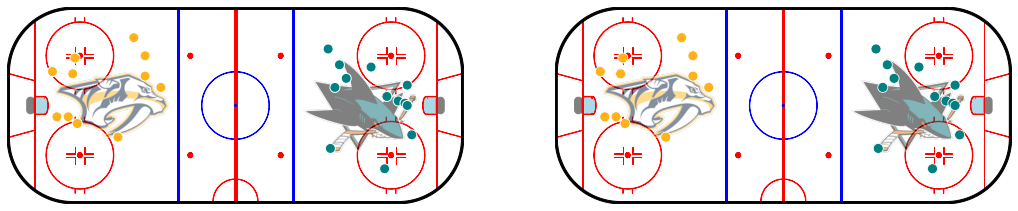

In [44]:

shots = (
    pd.read_parquet("https://github.com/sportsdataverse/fastRhockey-data/blob/main/nhl/pbp/parquet/play_by_play_2023.parquet?raw=true")
    .query("event_type in ('GOAL', 'SHOT', 'MISS')")
)

team_colors = {"San Jose Sharks": (0, 0.5, 0.5), "Nashville Predators": (1, 0.7, 0.1)}

rink = NHLRink(
    sharks_logo={
        "feature_class": RinkImage,
        "image_path": "https://upload.wikimedia.org/wikipedia/en/thumb/3/37/SanJoseSharksLogo.svg/330px-SanJoseSharksLogo.svg.png",
        "x": 55, "length": 50, "width": 42,
        "zorder": 15, "alpha": 0.5,
    },
    preds_logo={
        "feature_class": RinkImage,
        "image_path": "https://upload.wikimedia.org/wikipedia/en/thumb/9/9c/Nashville_Predators_Logo_%282011%29.svg/330px-Nashville_Predators_Logo_%282011%29.svg.png",
        "x": -55, "length": 50, "width": 29,
        "zorder": 15, "alpha": 0.5,
    }
)

first_period = shots.query("game_id == 2022020001 and period == 1")

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y", facecolor=first_period.event_team.map(team_colors), s=100, edgecolor="white", data=first_period, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="x", y="y", hue="event_team", s=100, legend=False, data=first_period, ax=axs[1], palette=team_colors);

In [46]:
ozone_shots_new = ozone_shots[ozone_shots['event_type'] == 'GOAL']
ozone_shots_new.loc[:,"is_goal"]

16         True
101        True
250        True
389        True
623        True
           ... 
1077218    True
1077223    True
1077263    True
1077302    True
1077376    True
Name: is_goal, Length: 9027, dtype: bool

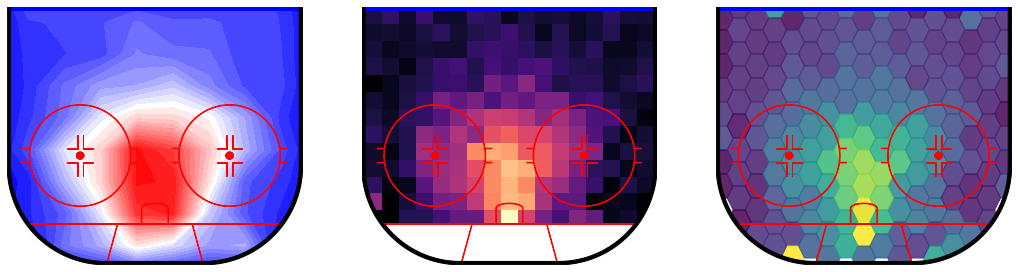

In [45]:
import numpy as np

ozone_shots = (
    shots
    .assign(
        is_goal=shots.event_type == "GOAL",
        x=np.abs(shots.x),
        y=shots.y * np.sign(shots.x),
    )
)

fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "x", "y", "is_goal", data=ozone_shots, 
    nbins=8, levels=30, plot_range="ozone", cmap="bwr",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "x", "y", "is_goal", data=ozone_shots, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "x", "y", "is_goal", data=ozone_shots,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

In [47]:
df_shots_22 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2022.csv')
df_shots_22_new = df_shots_22[df_shots_22['event'] == 'GOAL']
df_shots_22_2 = df_shots_22_new[df_shots_22_new['period'] == 1]
df_22_scatter = df_shots_22[df_shots_22['event'] != 'MISS']
df_22_scatter_2 = df_22_scatter[df_22_scatter['period'] == 3]
df_22_scatter_3 = df_22_scatter_2[df_22_scatter_2['team'] == 'HOME']
df_scatter_22 = df_shots_22[df_shots_22['event'] == 'GOAL']
pp_map = df_shots_22[df_shots_22['awayPenalty1TimeLeft'] != 0]
pp_map_22 = pp_map[pp_map['homePenalty1TimeLeft'] != 0]

In [48]:
pp_map_22['awayPenalty1TimeLeft']

71         88
72         77
315        82
316        74
317        71
         ... 
121743    389
121756     98
121757     74
121812     59
121813     27
Name: awayPenalty1TimeLeft, Length: 2086, dtype: int64

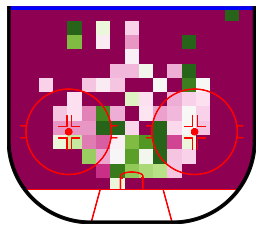

In [49]:
goals_2022_pp = (
    pp_map_22
    .assign(
        is_goal=pp_map_22.event == "GOAL",
        x_22_pp=np.abs(pp_map_22.xCordAdjusted),
        y_22_pp=pp_map_22.yCordAdjusted * np.sign(pp_map_22.xCordAdjusted),
    )
)

rink = NHLRink(rotation=270, net={"visible": False})

rink.heatmap(
    "x_22_pp", "y_22_pp", "is_goal", data=goals_2022_pp, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="PiYG", vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

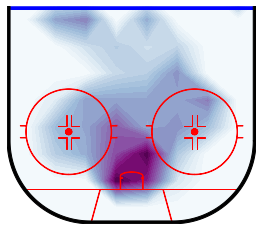

In [50]:
#visual for powerplay 22
rink.contourf(
    "x_22_pp", "y_22_pp", "is_goal", data=goals_2022_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

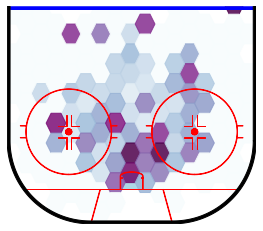

In [51]:
# maybe this one. can't decide
rink = NHLRink(rotation=270, net={"visible": False})

rink.hexbin(
    "x_22_pp", "y_22_pp", "is_goal", data=goals_2022_pp,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

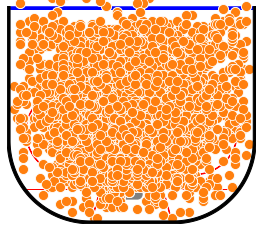

In [52]:
rink = NHLRink(rotation=270)
rink.draw(display_range="ozone")
rink.scatter("xCordAdjusted", "yCordAdjusted", s=100, edgecolor="white", data=df_scatter_22)
rink.plot_fn(sns.scatterplot, x="xCordAdjusted", y="yCordAdjusted", s=100, legend=False, data=df_scatter_22);

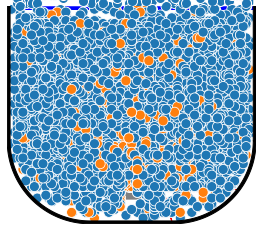

In [53]:
rink = NHLRink(rotation=270)
rink.draw(display_range="ozone")
rink.scatter("xCordAdjusted", "yCordAdjusted", s=100, edgecolor="white", data=df_22_scatter_3)
rink.plot_fn(sns.scatterplot, x="xCordAdjusted", y="yCordAdjusted", hue='event', s=100, legend=False, data=df_22_scatter_3);

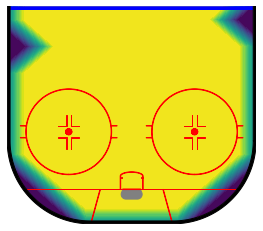

In [54]:
rink = NHLRink(rotation=270)
rink.contourf(
    "xCord", "yCord", data=df_shots_22_2, 
    nbins=8, levels=30, plot_range="ozone", 
     draw_kw={"display_range": "ozone"},
)


In [55]:
rink = NHLRink()


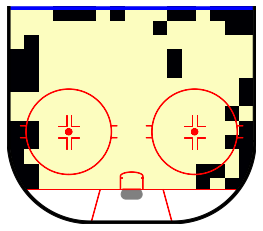

In [56]:
rink = NHLRink(rotation=270)
rink.heatmap(
    "xCordAdjusted", "yCordAdjusted", data=df_shots_22_2, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25, draw_kw={"display_range": "ozone"},
)

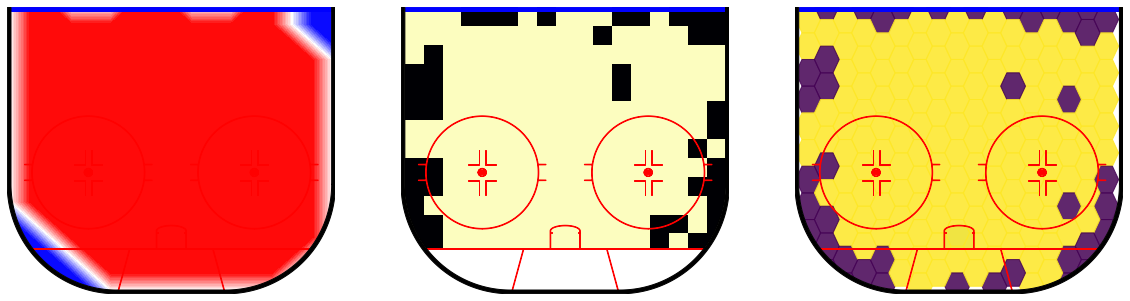

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "xCordAdjusted", "yCordAdjusted", data=df_shots_22_2, 
    nbins=8, levels=30, plot_range="ozone", cmap="bwr",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "xCordAdjusted", "yCordAdjusted", data=df_shots_22_2, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "xCordAdjusted", "yCordAdjusted", data=df_shots_22_2,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

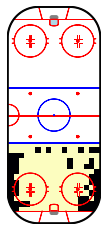

In [58]:
rink = NHLRink(rotation=270)
rink.heatmap(
    "xCord", "yCord", data=df_shots_22_2, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25
)

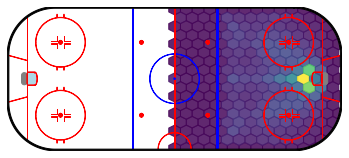

In [60]:
goals_2022_full = (
    df_shots_22
    .assign(
        is_goal=df_shots_22.event == "GOAL",
        x_22_full=np.abs(df_shots_22.xCord),
        y_22_full=df_shots_22.yCord * np.sign(df_shots_22.xCord),
    )
)

rink = NHLRink()
rink.hexbin(
    "x_22_full", "y_22_full", data=goals_2022_full,
    gridsize=(14, 8), alpha=0.85,
)

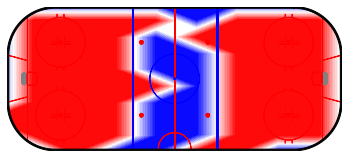

In [61]:
rink = NHLRink()
rink.contourf(
    "xCord", "yCord", data=df_shots_22_2, 
    nbins=8, levels=30,cmap="bwr"
)


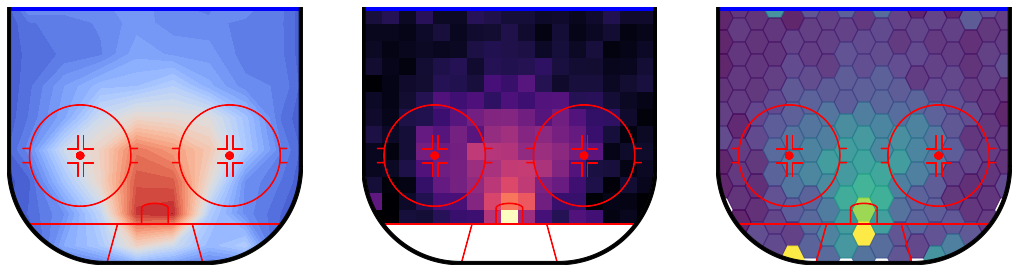

In [62]:
goals_2022 = (
    df_shots_22
    .assign(
        is_goal=df_shots_22.event == "GOAL",
        x_22=np.abs(df_shots_22.xCordAdjusted),
        y_22=df_shots_22.yCordAdjusted * np.sign(df_shots_22.xCordAdjusted),
    )
)

fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "x_22", "y_22", "is_goal", data=goals_2022, 
    nbins=8, levels=30, plot_range="ozone", cmap="coolwarm",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "x_22", "y_22", "is_goal", data=goals_2022, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "x_22", "y_22", "is_goal", data=goals_2022,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

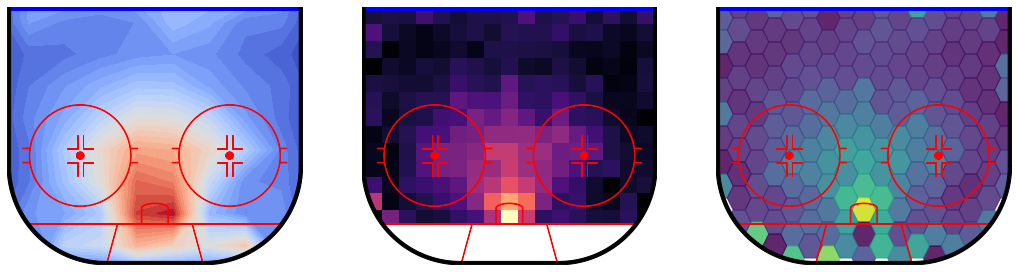

In [63]:
df_shots_21 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2021.csv')
goals_2021 = (
    df_shots_21
    .assign(
        is_goal=df_shots_21.event == "GOAL",
        x_21=np.abs(df_shots_21.xCordAdjusted),
        y_21=df_shots_21.yCordAdjusted * np.sign(df_shots_21.xCordAdjusted),
    )
)

fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "x_21", "y_21", "is_goal", data=goals_2021, 
    nbins=8, levels=30, plot_range="ozone", cmap="coolwarm",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "x_21", "y_21", "is_goal", data=goals_2021, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "x_21", "y_21", "is_goal", data=goals_2021,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

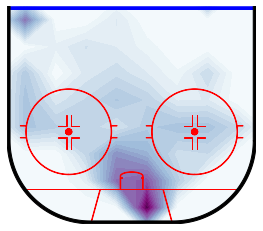

In [64]:
# 2021 powerplay visual.
pp_map_1 = df_shots_21[df_shots_21['awayPenalty1TimeLeft'] != 0]
pp_map_21 = pp_map_1[pp_map_1['homePenalty1TimeLeft'] != 0]

goals_2021_pp = (
    pp_map_21
    .assign(
        is_goal=pp_map_21.event == "GOAL",
        x_21_pp=np.abs(pp_map_21.xCordAdjusted),
        y_21_pp=pp_map_21.yCordAdjusted * np.sign(pp_map_21.xCordAdjusted),
    )
)

rink.contourf(
    "x_21_pp", "y_21_pp", "is_goal", data=goals_2021_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

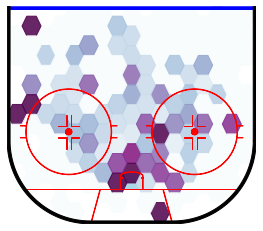

In [66]:
rink.hexbin(
    "x_21_pp", "y_21_pp", "is_goal", data=goals_2021_pp,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

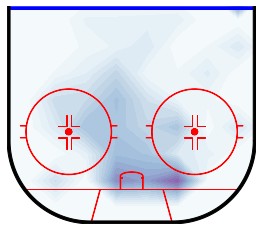

In [67]:
# 2011 powerplay visual
df_shots_11 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2011.csv')
pp_map_2 = df_shots_11[df_shots_11['awayPenalty1TimeLeft'] != 0]
pp_map_11 = pp_map_2[pp_map_2['homePenalty1TimeLeft'] != 0]

goals_2011_pp = (
    pp_map_11
    .assign(
        is_goal=pp_map_11.event == "GOAL",
        x_11_pp=np.abs(pp_map_11.xCordAdjusted),
        y_11_pp=pp_map_11.yCordAdjusted * np.sign(pp_map_11.xCordAdjusted),
    )
)

rink.contourf(
    "x_11_pp", "y_11_pp", "is_goal", data=goals_2011_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

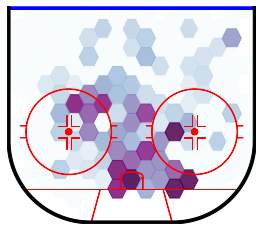

In [68]:
rink.hexbin(
    "x_11_pp", "y_11_pp", "is_goal", data=goals_2011_pp,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

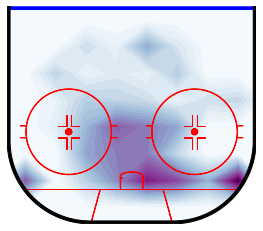

In [69]:
# 2013 powerplay visual
df_shots_13 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2013.csv')
pp_map_3 = df_shots_13[df_shots_13['awayPenalty1TimeLeft'] != 0]
pp_map_13 = pp_map_3[pp_map_3['homePenalty1TimeLeft'] != 0]

goals_2013_pp = (
    pp_map_13
    .assign(
        is_goal=pp_map_13.event == "GOAL",
        x_13_pp=np.abs(pp_map_13.xCordAdjusted),
        y_13_pp=pp_map_13.yCordAdjusted * np.sign(pp_map_13.xCordAdjusted),
    )
)

rink.contourf(
    "x_13_pp", "y_13_pp", "is_goal", data=goals_2013_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

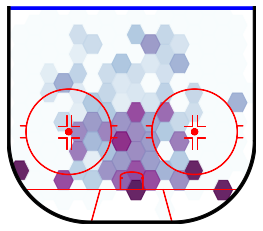

In [71]:
rink.hexbin(
    "x_13_pp", "y_13_pp", "is_goal", data=goals_2013_pp,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

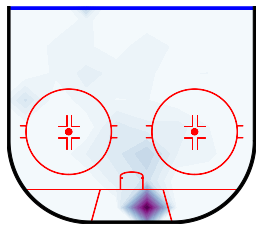

In [87]:
# 07-08 powerplay visuals
df_shots_07 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2007.csv')
pp_map_4 = df_shots_07[df_shots_07['awayPenalty1TimeLeft'] != 0]
pp_map_07 = pp_map_4[pp_map_4['homePenalty1TimeLeft'] != 0]

goals_2007_pp = (
    pp_map_07
    .assign(
        is_goal=pp_map_07.event == "GOAL",
        x_07_pp=np.abs(pp_map_07.xCordAdjusted),
        y_07_pp=pp_map_07.yCordAdjusted * np.sign(pp_map_07.xCordAdjusted),
    )
)

rink.contourf(
    "x_07_pp", "y_07_pp", "is_goal", data=goals_2007_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

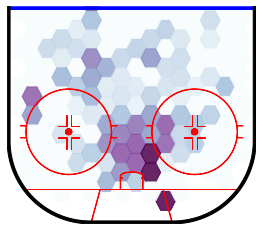

In [88]:
rink.hexbin(
    "x_07_pp", "y_07_pp", "is_goal", data=goals_2007_pp,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

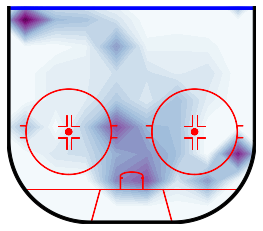

In [89]:
# 17-18 Powerplay visual
df_shots_17 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2017.csv')
pp_map_5 = df_shots_17[df_shots_17['awayPenalty1TimeLeft'] != 0]
pp_map_17 = pp_map_5[pp_map_5['homePenalty1TimeLeft'] != 0]

goals_2017_pp = (
    pp_map_17
    .assign(
        is_goal=pp_map_17.event == "GOAL",
        x_17_pp=np.abs(pp_map_17.xCordAdjusted),
        y_17_pp=pp_map_17.yCordAdjusted * np.sign(pp_map_17.xCordAdjusted),
    )
)

rink.contourf(
    "x_17_pp", "y_17_pp", "is_goal", data=goals_2017_pp, 
    nbins=8, levels=30, plot_range="ozone", cmap="BuPu",
    draw_kw={"display_range": "ozone"},
)

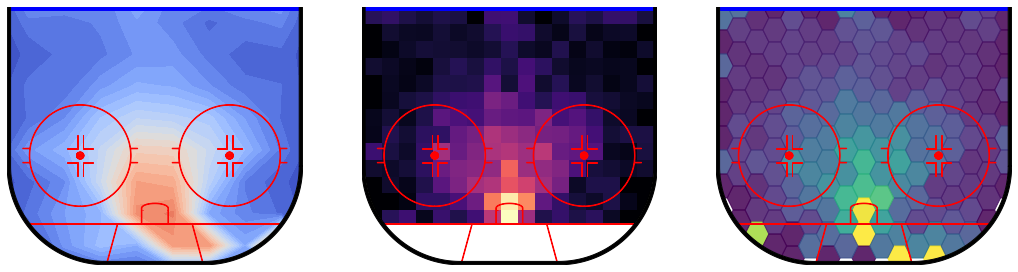

In [72]:
df_shots_20 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2020.csv')
goals_2020 = (
    df_shots_20
    .assign(
        is_goal=df_shots_20.event == "GOAL",
        x_20=np.abs(df_shots_20.xCordAdjusted),
        y_20=df_shots_20.yCordAdjusted * np.sign(df_shots_20.xCordAdjusted),
    )
)

fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "x_20", "y_20", "is_goal", data=goals_2020, 
    nbins=8, levels=30, plot_range="ozone", cmap="coolwarm",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "x_20", "y_20", "is_goal", data=goals_2020, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "x_20", "y_20", "is_goal", data=goals_2020,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

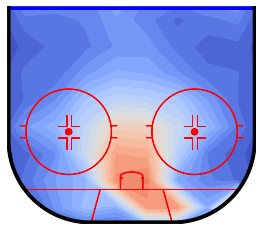

In [73]:
rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "x_20", "y_20", "is_goal", data=goals_2020, 
    nbins=8, levels=30, plot_range="ozone", cmap="coolwarm",
    draw_kw={"display_range": "ozone"},
)

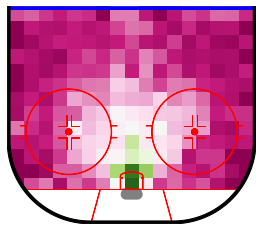

In [74]:
rink = NHLRink(rotation=270, net={"visible": True})

rink.heatmap(
    "x_20", "y_20", "is_goal", data=goals_2020, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="PiYG", vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

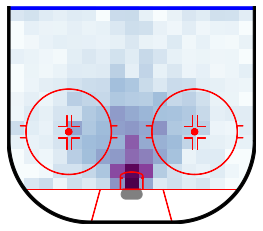

In [75]:
rink = NHLRink(rotation=270, net={"visible": True})

rink.heatmap(
    "x_20", "y_20", "is_goal", data=goals_2020, 
    binsize=5, fill_value=0, plot_xlim=(25, 89), cmap="BuPu", vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

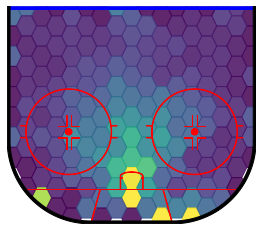

In [76]:
rink = NHLRink(rotation=270, net={"visible": False})

rink.hexbin(
    "x_20", "y_20", "is_goal", data=goals_2020,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

In [77]:
# rebound analysis
r_22 = df_shots_22[df_shots_22['shotRebound'] == 1]
r_22_g = r_22[r_22['event'] == 'GOAL']
len(r_22_g)

1219

In [78]:
r_11 = df_shots_11[df_shots_11['shotRebound'] == 1]
r_11_g = r_11[r_11['event'] == 'GOAL']
len(r_11_g)

1247

In [79]:
r_21 = df_shots_21[df_shots_21['shotRebound'] == 1]
r_21_g = r_21[r_21['event'] == 'GOAL']
len(r_21_g)

1283

In [80]:
r_13 = df_shots_13[df_shots_13['shotRebound'] == 1]
r_13_g = r_13[r_13['event'] == 'GOAL']
len(r_13_g)

1230

In [90]:
# After further analysis rebounds haven't changed over time. 

In [82]:
# shot type anlysis
shottype_22 = df_shots_22[df_shots_22['event'] == 'GOAL']
shottype_22['shotType'].value_counts()

shotType
WRIST    4282
SNAP     1654
TIP       906
SLAP      751
BACK      729
DEFL      235
WRAP       62
Name: count, dtype: int64

In [83]:
shottype_11 = df_shots_11[df_shots_11['event'] == 'GOAL']
shottype_11['shotType'].value_counts()

shotType
WRIST    3304
SNAP     1023
SLAP      947
BACK      705
TIP       652
DEFL      243
WRAP       56
Name: count, dtype: int64

In [84]:
shottype_21 = df_shots_21[df_shots_21['event'] == 'GOAL']
shottype_21['shotType'].value_counts()

shotType
WRIST    4547
SNAP     1356
BACK      834
SLAP      829
TIP       804
DEFL      280
WRAP       43
Name: count, dtype: int64

In [85]:
shottype_13 = df_shots_13[df_shots_13['event'] == 'GOAL']
shottype_13['shotType'].value_counts()

shotType
WRIST    3493
SNAP     1045
SLAP      859
BACK      696
TIP       672
DEFL      229
WRAP       69
Name: count, dtype: int64

In [86]:
# Covid season so need to normalize numbers if use it. 
shottype_20 = df_shots_20[df_shots_20['event'] == 'GOAL']
shottype_20['shotType'].value_counts()

shotType
WRIST    2904
SNAP      787
SLAP      559
TIP       507
BACK      503
DEFL      179
WRAP       38
Name: count, dtype: int64

In [91]:
shottype_07 = df_shots_07[df_shots_07['event'] == 'GOAL']
shottype_07['shotType'].value_counts()

shotType
WRIST    3121
SLAP     1172
SNAP     1165
TIP       845
BACK      662
DEFL      145
WRAP       67
Name: count, dtype: int64

In [92]:
shottype_17 = df_shots_17[df_shots_17['event'] == 'GOAL']
shottype_17['shotType'].value_counts()

shotType
WRIST    4069
SNAP     1128
SLAP      888
TIP       759
BACK      751
DEFL      262
WRAP       60
Name: count, dtype: int64

In [93]:
df_shots_08 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2008.csv')
shottype_08 = df_shots_08[df_shots_08['event'] == 'GOAL']
shottype_08['shotType'].value_counts()

shotType
WRIST    3381
SNAP     1154
SLAP     1128
TIP       777
BACK      748
DEFL      187
WRAP       75
Name: count, dtype: int64

In [94]:
df_shots_18 = pd.read_csv('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/shots_2018.csv')
shottype_18 = df_shots_18[df_shots_18['event'] == 'GOAL']
shottype_18['shotType'].value_counts()

shotType
WRIST    4174
SNAP     1191
SLAP      788
BACK      776
TIP       767
DEFL      258
WRAP       60
Name: count, dtype: int64

In [108]:
# Defense but offense analysis
d_goals_07 = shottype_07[shottype_07['playerPositionThatDidEvent'] == 'D']
d_shots_07 = df_shots_07[df_shots_07['playerPositionThatDidEvent'] == 'D']
len(d_goals_07)

1041

In [103]:
d_goals_22 = shottype_22[shottype_22['playerPositionThatDidEvent'] == 'D']
d_shots_22 = df_shots_22[df_shots_22['playerPositionThatDidEvent'] == 'D']
len(d_goals_22)

1272

In [101]:
d_goals_08 = shottype_08[shottype_08['playerPositionThatDidEvent'] == 'D']
len(d_goals_08)

1086

In [102]:
d_goals_21 = shottype_21[shottype_21['playerPositionThatDidEvent'] == 'D']
len(d_goals_21)

1248

In [171]:
d_goals_11 = shottype_11[shottype_11['playerPositionThatDidEvent'] == 'D']
len(d_goals_11)

995

In [172]:
d_goals_13 = shottype_13[shottype_13['playerPositionThatDidEvent'] == 'D']
len(d_goals_13)

1134

In [173]:
d_goals_17 = shottype_17[shottype_17['playerPositionThatDidEvent'] == 'D']
len(d_goals_17)

1235

In [174]:
d_goals_18 = shottype_18[shottype_18['playerPositionThatDidEvent'] == 'D']
len(d_goals_18)

1187

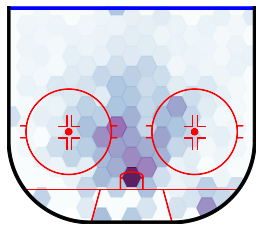

In [117]:
# visuals to further show shooting from anywhere and how involved offensivley the defense is.
goals_2022_d = (
    d_shots_22
    .assign(
        is_goal=d_shots_22.event == "GOAL",
        x_22_d=np.abs(d_shots_22.xCordAdjusted),
        y_22_d=d_shots_22.yCordAdjusted * np.sign(d_shots_22.xCordAdjusted),
    )
)
rink.hexbin(
    "x_22_d", "y_22_d", "is_goal", data=goals_2022_d,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

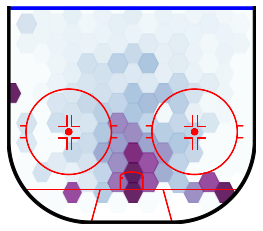

In [116]:
goals_2007_d = (
    d_shots_07
    .assign(
        is_goal=d_shots_07.event == "GOAL",
        x_07_d=np.abs(d_shots_07.xCordAdjusted),
        y_07_d=d_shots_07.yCordAdjusted * np.sign(d_shots_07.xCordAdjusted),
    )
)
rink.hexbin(
    "x_07_d", "y_07_d", "is_goal", data=goals_2007_d,
    gridsize=(14, 8), plot_range="ozone", cmap="BuPu", alpha=0.85, vmax=0.25,
    draw_kw={"display_range": "ozone"},
)

In [118]:
df_ex = (
    pd.read_csv("https://github.com/the-bucketless/bdc/raw/main/data/2022-02-08%20Canada%20at%20USA/2022-02-08%20Canada%20at%20USA%20P1%20PP1.csv")
    .query("frame_id == 400")
    .assign(team_color=lambda df_: np.where(df_.team_name == "Canada", "lightcoral", "aqua"))
)
df_ex

,frame_id,period,track_id,team_id,team_name,jersey_number,x_ft,y_ft,video_shot,game_seconds,team_color
776,400,1,3,Dark,USA,35,183.863980,47.719656,1,373,aqua
777,400,1,7,Dark,USA,5,173.704376,58.837954,1,373,aqua
778,400,1,1,Light,Canada,6,155.548525,56.150708,1,373,lightcoral
779,400,1,22,Light,Canada,10,184.453801,35.549246,1,373,lightcoral
780,400,1,8,Dark,USA,25,153.165143,66.014445,1,373,aqua
781,400,1,2,Dark,USA,2,175.394477,45.542191,1,373,aqua
782,400,1,13,Light,Canada,29,153.751883,73.979380,1,373,lightcoral
783,400,1,4,Light,Canada,19,182.096510,63.012904,1,373,lightcoral
784,400,1,5,Dark,USA,28,161.517096,46.863728,1,373,aqua
785,400,1,9,Light,Canada,23,129.355513,34.939590,1,373,lightcoral


In [119]:
df_scatter_22['xCordAdjusted']

3         74
16        78
38        63
64        63
91        57
          ..
121749    51
121757    80
121784    69
121821    82
121828    44
Name: xCordAdjusted, Length: 8767, dtype: int64

In [120]:
df_scatter_22['yCordAdjusted']

3          5
16       -13
38        14
64        11
91       -17
          ..
121749    16
121757     3
121784    23
121821     2
121828     1
Name: yCordAdjusted, Length: 8767, dtype: int64

[Text(90, -15, 'F'),
 Text(51, -25, 'F'),
 Text(75, 0, 'F'),
 Text(51, 23, 'F'),
 Text(35, 0, 'D')]

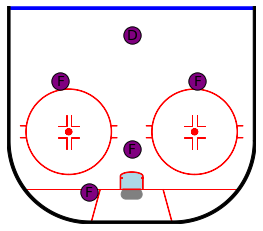

In [163]:
pp_data = [['F', 90, -15], ['F', 51, -25], ['F', 75, 0], ['F', 51, 23], ['D', 35, 0]]
pp_scatter_22 = pd.DataFrame(pp_data, columns=['position', 'x', 'y'])
rink = NHLRink(rotation=270)


rink.draw(display_range="ozone")
    
rink.scatter(
        "x", "y",
        facecolor="purple", edgecolor="black", s=300,
        data=pp_scatter_22,
    )

rink.text(
        "x", "y", "position",
        ha="center", va="center", fontsize=14, 
        data=pp_scatter_22,
    )

[Text(30, -39, 'D'),
 Text(30, 0, 'D'),
 Text(60, -39, 'F'),
 Text(90, -25, 'F'),
 Text(80, 0, 'F')]

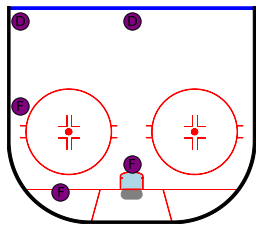

In [164]:
pp_data_1 = [["D", 30, -39], ["D", 30, 0], ["F", 60, -39], ["F", 90, -25], ["F", 80, 0]]
pp_scatter_df_07 = pd.DataFrame(pp_data_1, columns=['position', 'x', 'y'])
rink = NHLRink(rotation=270)


rink.draw(display_range="ozone")
    
rink.scatter(
        "x", "y",
        facecolor="purple", edgecolor="black", s=300,
        data=pp_scatter_df_07,
    )

rink.text(
        "x", "y", "position",
        ha="center", va="center", fontsize=14, 
        data=pp_scatter_df_07,
    )

[Text(30, -39, 'D'),
 Text(40, -5, 'F'),
 Text(60, -39, 'F'),
 Text(70, -5, 'F'),
 Text(80, 5, 'F')]

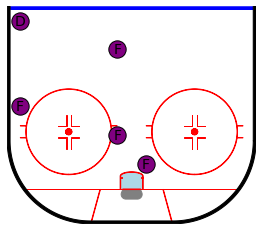

In [170]:
pp_data_2 = [["D", 30, -39], ["F", 40, -5], ["F", 60, -39], ["F", 70, -5], ["F", 80, 5]]
pp_scatter_df_17 = pd.DataFrame(pp_data_2, columns=['position', 'x', 'y'])
rink = NHLRink(rotation=270)


rink.draw(display_range="ozone")
    
rink.scatter(
        "x", "y",
        facecolor="purple", edgecolor="black", s=300,
        data=pp_scatter_df_17,
    )

rink.text(
        "x", "y", "position",
        ha="center", va="center", fontsize=14, 
        data=pp_scatter_df_17,
    )